In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
def backtracking(f, grad_f, x, D):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x, D), D) > f(x, D) - c * alpha * np.linalg.norm(grad_f(x, D)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

def GD(f, grad_f, x0, kmax:int, tolf:float, tolx:float, alpha):
    # As output we want:
    # x -> The stationary point
    # k an integer, the number of iteration to the convergence
    # f_val -> A vector containing the values of f during the iterations
    # err_val -> A vector containing the values of || grad_f(x_k) || for any k
    
    # alpha = getAlpha()
    allx = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err_val = [np.linalg.norm(grad_f((x0)))]
    k = 0

    first = True

    while k<kmax and \
        np.linalg.norm(grad_f((x0))) >= tolf*np.linalg.norm(grad_f((allx[0]))) and \
            (first or np.linalg.norm(x0 - allx[-2]) >= tolx*np.linalg.norm(allx[0])):

        if k%20==0:
            print(f"iteration: {k}")

        first = False
        
        # Updare x
        x = x0 - alpha*grad_f((x0))
        
        # save the values
        allx.append(x)
        f_val.append(f(x))
        err_val.append(np.linalg.norm(grad_f((x))))
        grads.append(grad_f((x)))

        # Update k 
        k += 1
        
        # restart
        x0 = x

        #print(x0, allx[-1],grad_f((x0)), "\n",np.linalg.norm(x0 - allx[-1]), tolx*np.linalg.norm(allx[0]))

    return allx, k, f_val, grads, err_val


def GDbacktracking(f, grad_f, x0, kmax:int, tolf:float, tolx:float, D):
    # As output we want:
    # x -> The stationary point
    # k an integer, the number of iteration to the convergence
    # f_val -> A vector containing the values of f during the iterations
    # err_val -> A vector containing the values of || grad_f(x_k) || for any k
    
    alpha = backtracking(f, grad_f, x0, D)
    allx = [x0]
    f_val = [f(x0, D)]
    grads = []#grads = [grad_f(x0, D)]
    err_val = [np.linalg.norm(grad_f(x0, D))]
    k = 0

    first = True

    while k<kmax and \
        np.linalg.norm(grad_f(x0, D)) >= tolf*np.linalg.norm(grad_f(allx[0], D)) and \
            (first or np.linalg.norm(x0 - allx[-2]) >= tolx*np.linalg.norm(allx[0])):

        first = False

        if k%20==0:
            print(f"iteration: {k}")
        
        err_val.append(np.linalg.norm(grad_f(x0, D)))

        # Updare x
        gr = grad_f(x0,D)
        x = x0 - alpha*gr
        
        # save the values
        allx.append(x)
        # f_val.append(f(x, D))
        
        # grads.append(grad_f(x, D))

        # Update k 
        k += 1
        
        # update alpha
        alpha=backtracking(f, grad_f, x0, D)

        # restart
        x0 = x

        #print(x0, allx[-1],grad_f((x0)), "\n",np.linalg.norm(x0 - allx[-1]), tolx*np.linalg.norm(allx[0]))

    return allx, k, f_val, grads, err_val

In [3]:
def SGD(f, grad_f, w0, D, batch_size, n_epochs):
    # As output we want:
    # x -> The stationary point
    alpha = 0.01
    
    # D is a dataset
    # D = (X,Y) where X is d x N and Y is N

    X, Y = D # Split D into X and Y
    d, N = X.shape

    n_batch_per_epoch = int(N / batch_size) 
    rest = N % batch_size
    if rest != 0:
        n_batch_per_epoch += 1

    X_backup = X
    Y_backup = Y

    # print("X_backup: ", X_backup.shape)
    # print("Y_backup: ", Y_backup.shape)

    # print ("n_batch_per_epoch: ", n_batch_per_epoch)
    # print("rest: ", rest)

    allW = [w0]
    f_val = [f(w0, D)]
    grads = [grad_f(w0, D)]
    errs = [np.linalg.norm(grad_f(w0, D), 2)]

    ite=0

    # Start the iterations
    for epoch in range(n_epochs):
        if epoch%5 == 0 :
            print("epoch: ", epoch)
        # shuffle
        idx = np.arange(N)
        idx = idx.astype(int)
        np.random.shuffle(idx)

        X = X[:, idx]
        Y = Y[idx]        

        for k in range(n_batch_per_epoch):
            # Sample m from D
            # Mx <- X # Has shape d x batch_size
            # My <- Y # Has shape batch_size

            #print("Xshape: ", X.shape)
            my_batch_size = min(batch_size, X.shape[1])

            Mx = X[:, :my_batch_size]
            My = Y[:my_batch_size]
            M = (Mx, My)

            # remove Mx and My from x and y
            X = X[:, my_batch_size:]# np.delete(X, np.s_[:, 0:my_batch_size])
            Y = Y[my_batch_size:] #np.delete(Y, np.s_[0:my_batch_size])

            # update x 
            grad = np.reshape(grad_f(w0, M), w0.shape)
            w = w0 - alpha * grad

            # restart
            w0 = w
            allW.append(w0)

            errs.append(np.linalg.norm(grad_f(w0, D), 2))
            ite+=1
         
        # reload X and Y
        X = X_backup
        Y = Y_backup
        
        f_val.append(f(w0, D))
        grads.append(grad_f(w0, D))
        

        ## ATTENTION: You have to shuffle again (differently)

    return allW, f_val, grads, errs, ite


In [4]:
# Setup for logicistic regression
# Create Xhat
# Xhat = np.concatenate((np.ones((Ntrain,1)).T, Xtrain), axis=0)
# print("Xhat shape", Xhat.shape)


def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def f(w, xhat):
    return sigmoid(xhat.T @ w)

def fXhat(w, Xhat):
    #print("Xhat shape: ", Xhat[:, 0].shape)
    N = Xhat.shape[1]
    res = np.zeros(w.shape)
    for i in range(N):
        fres = f(w, Xhat[:, i].reshape(Xhat.shape[0], 1))
        res += fres
    #print("res shape: ", res.shape)
    return res


def l(w, D):
    X, Y = D
    return 0.5*np.linalg.norm(fXhat(w, X) - Y, 2)**2

# Value of the gradient  
def grad_l(w, D):
    X, Y = D
    N = X.shape[1]
    #print("The N here is: ", N)
    res = np.zeros((len(w), 1))
    for i in range(N):
        #print(X[:, i].T.shape, w.shape)
        p1 = sigmoid(X[:, i].reshape(X[:, i].shape[0], 1).T @ w)
        # p2 = 1 - sigmoid(X[:, i].reshape(X[:, i].shape[0], 1).T @ w)
        p3 = X[:, i].reshape(X[:, i].shape[0], 1)
        #p4 = f(w, X[:, i].reshape(X[:, i].shape[0], 1)) - Y[i]
        
        res1 = p1*(1-p1) * p3* (f(w, p3) - Y[i])
        res += res1
    
    return (1/N) * res


In [5]:
def plots(n_epoch, errs1, k, errs2):
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    plt.plot(list(range(0, n_epoch+1, 1)), errs1)
    plt.title('Errors per iteration')
    plt.xlabel('epoch')
    plt.ylabel('err')
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(list(range(0, k+1, 1)), errs2)
    plt.title('Errors per iteration')
    plt.xlabel('k')
    plt.ylabel('err')
    plt.grid()

    plt.legend(['GD', 'SGD'])

    plt.show()

def plotsW(n_epoch, w1, k, w2, d1, d2):
    print(n_epoch, k, d1, d2)
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    plt.plot(list(range(0, n_epoch+1, 1)), np.array(w1).reshape(n_epoch+1, d1))
    plt.title('Errors per iteration')
    plt.xlabel('epoch')
    plt.ylabel('err')
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(list(range(0, k+1, 1)), np.array(w2).reshape(k+1, d2))
    plt.title('Errors per iteration')
    plt.xlabel('k')
    plt.ylabel('err')
    plt.grid()

    plt.legend(['GD', 'SGD'])

    plt.show()



def computeAccuracy(Xtest, Ytest, w, digit1, digit2):
    true = 0
    count0 = 0
    count1 = 0

    n_test = Ytest.shape[0]

    for i in range(n_test):
        x = Xtest[:, i]
        if Ytest[i] == digit1:
            y = 0
        else:
            y = 1
        res = np.rint(f(w, x))
        if res==0:
            count0 += 1
        if res==1:
            count1 += 1

        if y == res:
            true += 1

    print("ntest: ", n_test, "\n0s: ", count0, "\n1s: ", count1)
    print("accuracy: ", true*100/n_test)

In [6]:
def extract_sub_dataset(X, Y, digit:int):
    I = (Y == digit)
    return X[:, I], Y[I]

def splitDataset(X,  Y, Ntrain:int):
    idx = np.arange(X.shape[1])
    idx = idx.astype(int)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]
    
    Xtrain = X[:, train_idx]
    Xtest = X[:, test_idx]

    Ytrain = Y[train_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

def exec(Ntrain, digit1, digit2):
    data = pd.read_csv('../lab2/data.csv')
    np_data = np.array(data)

    X = np_data[:, 1:]
    X = X.T
    Y = np_data[:, 0]

    d, N = X.shape
           
    digits = [digit1, digit2]

    X1, Y1 = extract_sub_dataset(X, Y, digits[0])
    X2, Y2 = extract_sub_dataset(X, Y, digits[1])

    X, Y = np.concatenate((X1,X2), axis=1), np.concatenate((Y1,Y2))
    d, N = X.shape
    
    (Xtrain, Ytrain), (Xtest, Ytest) = splitDataset(X, Y, Ntrain)
    Xhat = np.concatenate((np.ones((Ntrain,1)).T, Xtrain), axis=0)

    w = np.random.normal(0, 1, size=(d+1,1)).reshape(d+1, 1)

    batch_size = 64
    n_epoch = 30
    allW1, f_val1, grads1, errs1, k1 = SGD(l, grad_l, w, (Xhat, Ytrain), batch_size, n_epoch)
    kmax = 50
    tolf = tolx = 10e-10
    allW2, k2, f_val2, grads2, errs2 = GDbacktracking(l, grad_l, w, kmax, tolf, tolx, (Xhat, Ytrain))
    
    n_test = len(Ytest)
    Xhat_test = np.concatenate((np.ones((N-Ntrain,1)).T, Xtest), axis=0)

    computeAccuracy(Xhat_test, Ytest, allW1[-1], digit1, digit2)
    computeAccuracy(Xhat_test, Ytest, allW2[-1], digit1, digit2)

    plots(k1, errs1, k2, errs2)
    #plotsW(k1, allW1, k2, allW2, d+1, d+1)


epoch:  0
epoch:  5
epoch:  10
epoch:  15
epoch:  20
epoch:  25
iteration: 0
iteration: 20
iteration: 40
ntest:  8316 
0s:  799 
1s:  7517
accuracy:  45.26214526214526
ntest:  8316 
0s:  799 
1s:  7517
accuracy:  45.26214526214526


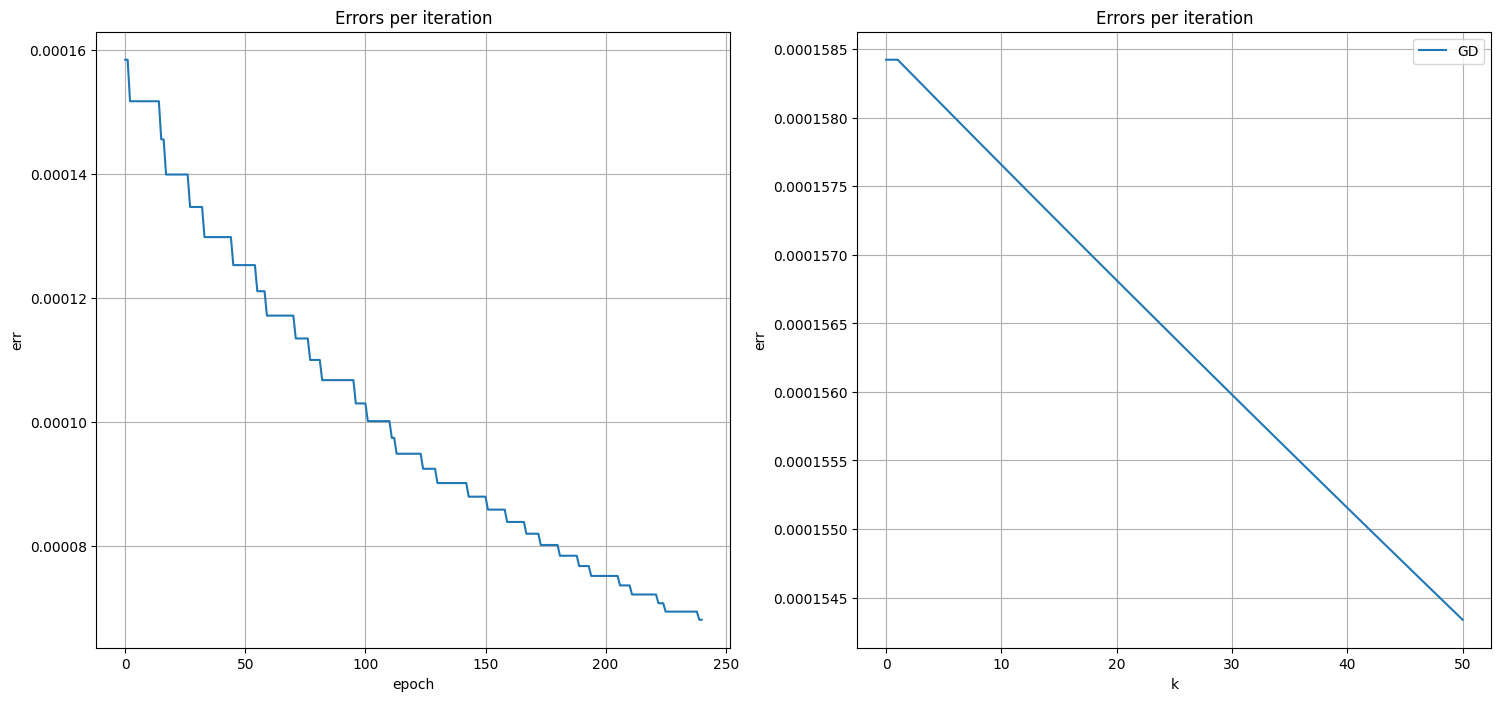

In [33]:
exec(500, 0, 1)

epoch:  0
epoch:  5
epoch:  10
epoch:  15
epoch:  20
epoch:  25
iteration: 0
iteration: 20
ntest:  7316 
0s:  1649 
1s:  5667
accuracy:  72.86768726079825
ntest:  7316 
0s:  3166 
1s:  4150
accuracy:  92.86495352651723


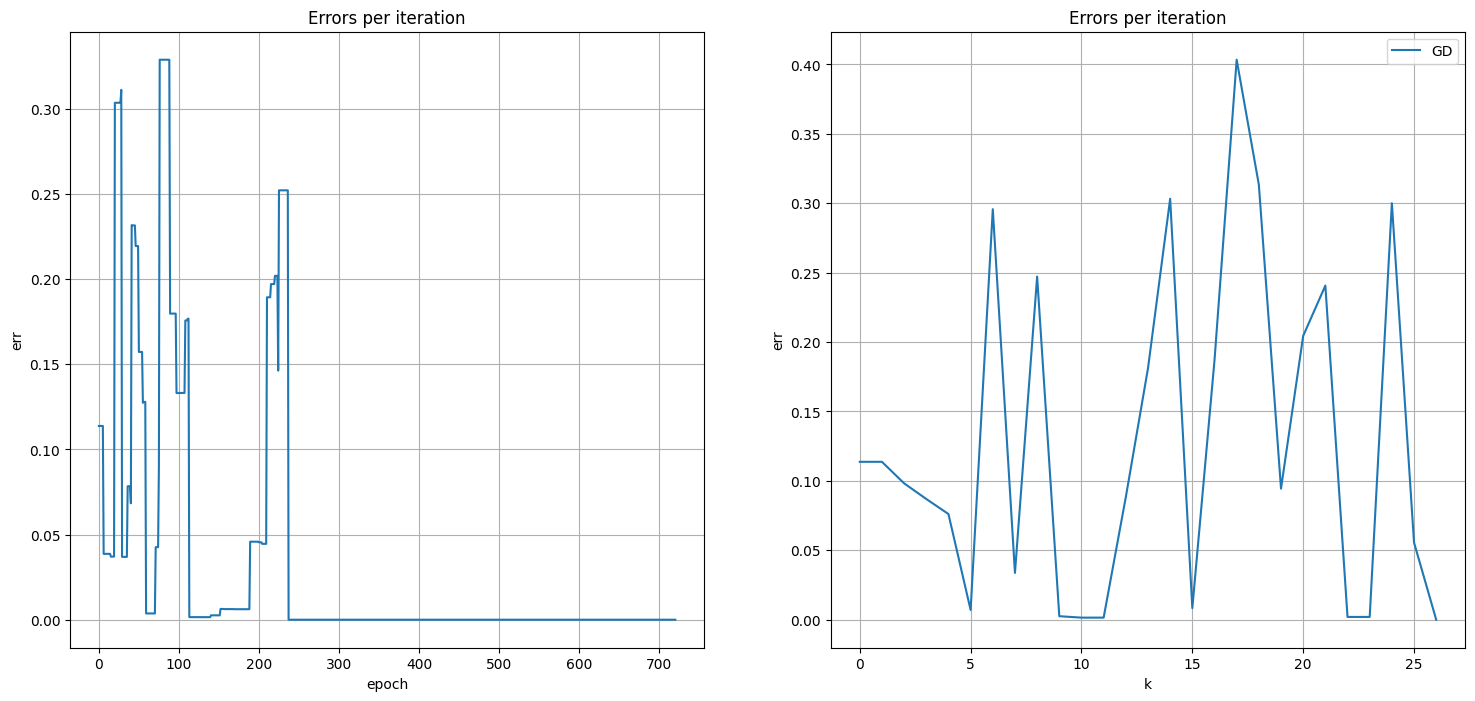

In [35]:
exec(1500, 0, 1)

epoch:  0
epoch:  5
epoch:  10
epoch:  15
epoch:  20
epoch:  25
iteration: 0
iteration: 20
iteration: 40
ntest:  7528 
0s:  3310 
1s:  4218
accuracy:  62.73910733262487
ntest:  7528 
0s:  6106 
1s:  1422
accuracy:  56.25664187035069


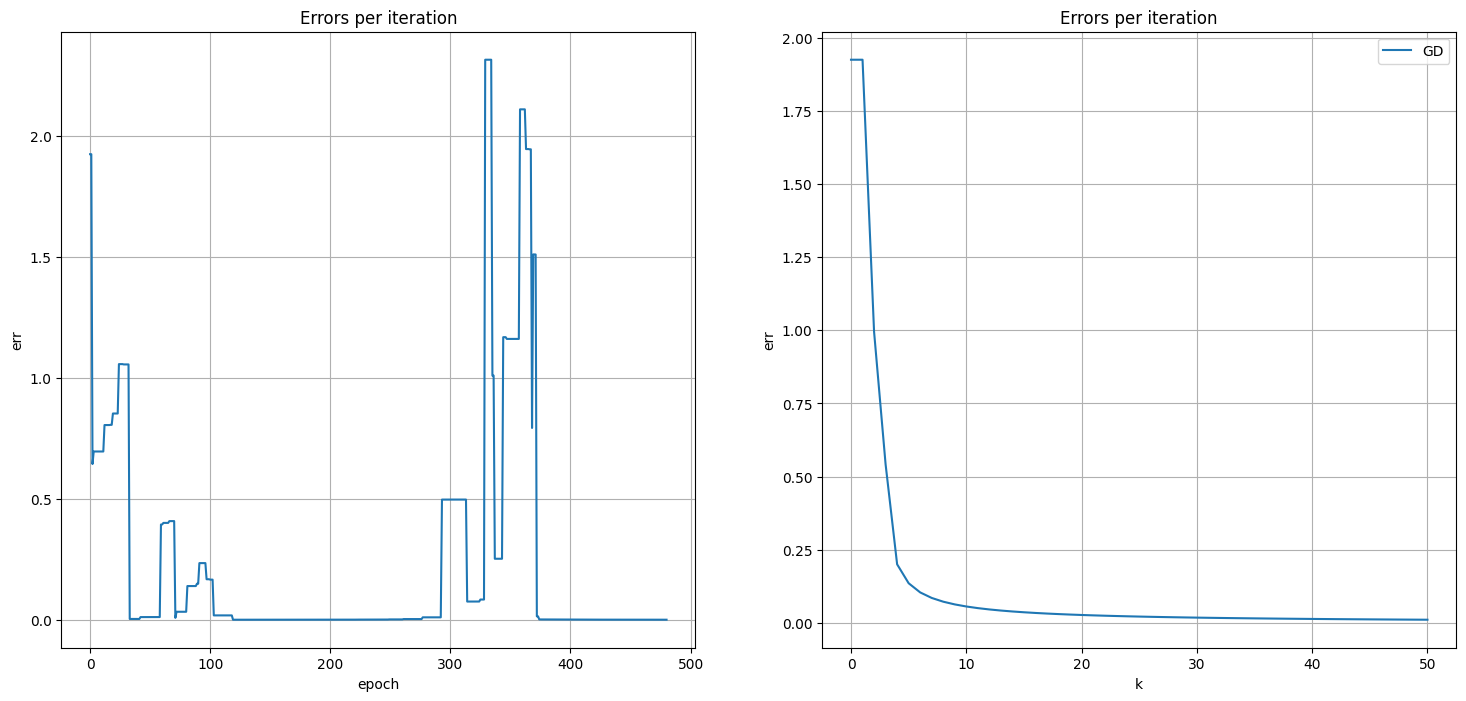

In [7]:
exec(1000, 2, 3)